# Setup code taken from coursework_1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x109f4aef0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x109f4d860>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser

# Testing my Adam class

Epoch 1: 4.5s to complete
    error(train)=3.46e+00, acc(train)=1.75e-01, error(valid)=3.46e+00, acc(valid)=1.74e-01


Epoch 2: 4.1s to complete
    error(train)=2.78e+00, acc(train)=3.62e-01, error(valid)=2.78e+00, acc(valid)=3.60e-01


Epoch 3: 4.4s to complete
    error(train)=2.19e+00, acc(train)=4.71e-01, error(valid)=2.20e+00, acc(valid)=4.67e-01


Epoch 4: 4.2s to complete
    error(train)=1.86e+00, acc(train)=5.23e-01, error(valid)=1.86e+00, acc(valid)=5.20e-01


Epoch 5: 4.1s to complete
    error(train)=1.67e+00, acc(train)=5.59e-01, error(valid)=1.67e+00, acc(valid)=5.56e-01


Epoch 6: 4.6s to complete
    error(train)=1.55e+00, acc(train)=5.83e-01, error(valid)=1.55e+00, acc(valid)=5.80e-01


Epoch 7: 4.6s to complete
    error(train)=1.47e+00, acc(train)=6.02e-01, error(valid)=1.47e+00, acc(valid)=5.98e-01


Epoch 8: 4.5s to complete
    error(train)=1.41e+00, acc(train)=6.15e-01, error(valid)=1.41e+00, acc(valid)=6.11e-01


Epoch 9: 4.6s to complete
    error(train)=1.36e+00, acc(train)=6.27e-01, error(valid)=1.36e+00, acc(valid)=6.23e-01


Epoch 10: 4.4s to complete
    error(train)=1.32e+00, acc(train)=6.36e-01, error(valid)=1.33e+00, acc(valid)=6.31e-01


Epoch 11: 5.3s to complete
    error(train)=1.29e+00, acc(train)=6.44e-01, error(valid)=1.29e+00, acc(valid)=6.38e-01


Epoch 12: 5.3s to complete
    error(train)=1.26e+00, acc(train)=6.51e-01, error(valid)=1.27e+00, acc(valid)=6.45e-01


Epoch 13: 4.0s to complete
    error(train)=1.23e+00, acc(train)=6.58e-01, error(valid)=1.24e+00, acc(valid)=6.54e-01


Epoch 14: 4.0s to complete
    error(train)=1.21e+00, acc(train)=6.65e-01, error(valid)=1.22e+00, acc(valid)=6.60e-01


Epoch 15: 3.9s to complete
    error(train)=1.19e+00, acc(train)=6.69e-01, error(valid)=1.20e+00, acc(valid)=6.68e-01


Epoch 16: 3.9s to complete
    error(train)=1.17e+00, acc(train)=6.76e-01, error(valid)=1.17e+00, acc(valid)=6.72e-01


Epoch 17: 5.1s to complete
    error(train)=1.15e+00, acc(train)=6.80e-01, error(valid)=1.16e+00, acc(valid)=6.76e-01


Epoch 18: 4.6s to complete
    error(train)=1.13e+00, acc(train)=6.85e-01, error(valid)=1.14e+00, acc(valid)=6.80e-01


Epoch 19: 6.4s to complete
    error(train)=1.11e+00, acc(train)=6.90e-01, error(valid)=1.12e+00, acc(valid)=6.81e-01


Epoch 20: 4.9s to complete
    error(train)=1.09e+00, acc(train)=6.93e-01, error(valid)=1.11e+00, acc(valid)=6.87e-01


Epoch 21: 4.0s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.91e-01


Epoch 22: 4.4s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


Epoch 23: 4.2s to complete
    error(train)=1.05e+00, acc(train)=7.04e-01, error(valid)=1.06e+00, acc(valid)=6.99e-01


Epoch 24: 4.3s to complete
    error(train)=1.03e+00, acc(train)=7.08e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


Epoch 25: 4.2s to complete
    error(train)=1.02e+00, acc(train)=7.11e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


Epoch 26: 4.2s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


Epoch 27: 4.4s to complete
    error(train)=9.96e-01, acc(train)=7.17e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


Epoch 28: 4.2s to complete
    error(train)=9.83e-01, acc(train)=7.21e-01, error(valid)=9.98e-01, acc(valid)=7.16e-01


Epoch 29: 4.1s to complete
    error(train)=9.71e-01, acc(train)=7.25e-01, error(valid)=9.86e-01, acc(valid)=7.17e-01


Epoch 30: 4.2s to complete
    error(train)=9.59e-01, acc(train)=7.27e-01, error(valid)=9.75e-01, acc(valid)=7.20e-01


Epoch 31: 4.2s to complete
    error(train)=9.48e-01, acc(train)=7.30e-01, error(valid)=9.65e-01, acc(valid)=7.23e-01


Epoch 32: 4.1s to complete
    error(train)=9.37e-01, acc(train)=7.32e-01, error(valid)=9.54e-01, acc(valid)=7.26e-01


Epoch 33: 4.2s to complete
    error(train)=9.27e-01, acc(train)=7.35e-01, error(valid)=9.44e-01, acc(valid)=7.28e-01


Epoch 34: 4.3s to complete
    error(train)=9.17e-01, acc(train)=7.37e-01, error(valid)=9.36e-01, acc(valid)=7.29e-01


Epoch 35: 4.2s to complete
    error(train)=9.08e-01, acc(train)=7.39e-01, error(valid)=9.26e-01, acc(valid)=7.33e-01


Epoch 36: 6.0s to complete
    error(train)=8.98e-01, acc(train)=7.42e-01, error(valid)=9.17e-01, acc(valid)=7.34e-01


Epoch 37: 4.2s to complete
    error(train)=8.89e-01, acc(train)=7.44e-01, error(valid)=9.08e-01, acc(valid)=7.36e-01


Epoch 38: 4.1s to complete
    error(train)=8.81e-01, acc(train)=7.46e-01, error(valid)=9.01e-01, acc(valid)=7.37e-01


Epoch 39: 4.0s to complete
    error(train)=8.72e-01, acc(train)=7.49e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


Epoch 40: 4.0s to complete
    error(train)=8.64e-01, acc(train)=7.50e-01, error(valid)=8.85e-01, acc(valid)=7.42e-01


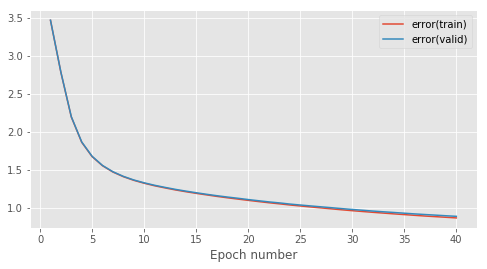

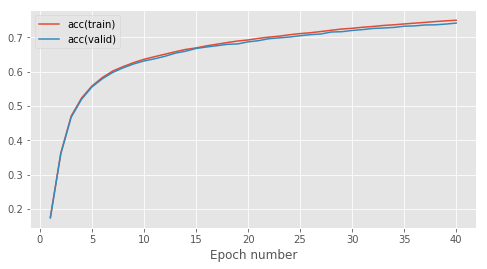

In [6]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
learning_rate = 0.00001
num_epochs = 40
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)